
## Quenstion1

A publishing firm wants to develop special printing machines for the English language. To achieve this, they need to determine the probability of occurrence of specific letters and words. You are given two large text files: **fileA** and **fileB**.


### Tasks

a. **Determine the probability of each alphabet in the English language**:  
   - Treat upper-case and lower-case alphabets as the same.  
   - List the top ten alphabets that occur in **fileA**.



In [13]:
seen={}   # creating a dictionary that will store all character and thier freq
with open("fileA.txt") as file:   # opeing the file
    for line in file:    # extracting each line as a for loop
        for i in line:   # extracting each charachter in the  line
            if 65<=ord(i)<=90 or 97<=ord(i)<=122:   # if thier assci val lies between range then it's a valid character
                if i in seen:
                    seen[i][0]+=1   # if it's present than icrement freq
                else:
                    seen[i]=[1]     # if it is not in seem than make it's entry
print(seen)  #print the final result

{'q': [393], 'a': [375], 'f': [410], 'w': [405], 'v': [380], 'o': [387], 'd': [397], 'b': [394], 'h': [376], 'l': [359], 'e': [379], 'k': [398], 't': [403], 'g': [361], 'r': [354], 'n': [368], 'p': [348], 'm': [384], 's': [426], 'j': [400], 'x': [402], 'z': [415], 'u': [403], 'y': [415], 'c': [360], 'i': [358]}


In [14]:
total_freq=sum([k[0] for k in seen.values()])    # calculating the total freq
total_freq

10050

In [15]:
for i,j in seen.items():
    print("the probability of occurence of",i,"is",j[0]/total_freq)
    j.append(j[0]/total_freq)    # calcuating the mean and storing it in the same dictionary for the future use

the probability of occurence of q is 0.039104477611940296
the probability of occurence of a is 0.03731343283582089
the probability of occurence of f is 0.04079601990049751
the probability of occurence of w is 0.04029850746268657
the probability of occurence of v is 0.03781094527363184
the probability of occurence of o is 0.038507462686567163
the probability of occurence of d is 0.039502487562189055
the probability of occurence of b is 0.03920398009950249
the probability of occurence of h is 0.037412935323383086
the probability of occurence of l is 0.03572139303482587
the probability of occurence of e is 0.03771144278606965
the probability of occurence of k is 0.03960199004975124
the probability of occurence of t is 0.04009950248756219
the probability of occurence of g is 0.03592039800995025
the probability of occurence of r is 0.03522388059701492
the probability of occurence of n is 0.036616915422885574
the probability of occurence of p is 0.03462686567164179
the probability of occuren

the top 10 most ouccuring characters are :
['s', 'y', 'z', 'f', 'w', 'u', 't', 'x', 'j', 'k']


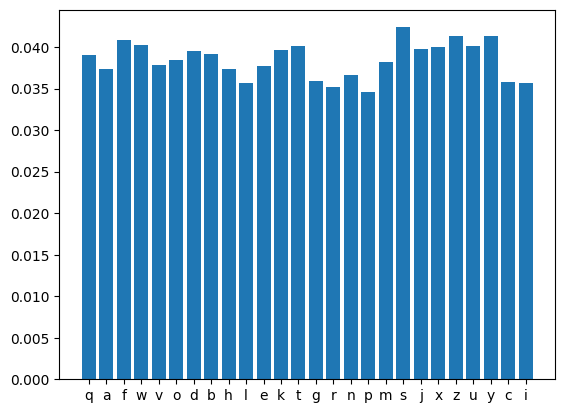

In [4]:
sorted_freq=dict(sorted(seen.items(), key=lambda item: item[1]))    # sorting the dict by it's val to fin the most frequent at the bottom
print("the top 10 most ouccuring characters are :")
check=0
most=list(sorted_freq.keys())  #soring the most freq character in  a list

print(most[-1:-11:-1])   # printing the top 10 most freq characters using array slicing

import matplotlib.pyplot as plt
probabilities=[k[1] for k in seen.values() ]
plt.bar(seen.keys() ,height=probabilities)   # creating a pie chart
plt.show()

## (b).

The measure of uncertainty is determined by its entropy. Entropy should be computed as
H =
X(−pi
log pi)
where pi
is the probability of event i. If we consider the occurrence of alphabets in
English as events of interest, determine the entropy. In other words, determine the
uncertainty of alphabets in the English language using fileB.

In [5]:
import math
def entropy(p):   #making a founcntion to calculate the entropy
    
    return sum(k*math.log2(k) for k in p)*-1

In [6]:
file_b={}  # creating a freq names dictionary
with open("fileB.txt") as file:  
    for line in file:
        for i in line:
            if 65<=ord(i)<=90:    # if ascii vale is in this range than it is in capital so make it small 
                i=chr(ord(i)+32)
            if 97<=ord(i)<=122:  # if ascii  value in this e=range than it is in small alphabet whoch we can store
                if i in file_b:
                    file_b[i][0]+=1
                else:
                    file_b[i]=[1]
print(file_b)
total_freq_B=sum([k[0] for k in file_b.values()])
for i,j in file_b.items():
    print("the probability of occurence of",i,"is",j[0]/total_freq_B)     
    j.append(j[0]/total_freq_B)  # calculating and storing mean for fututre use

{'j': [1322], 'a': [63844], 'n': [55278], 'e': [102429], 'y': [17616], 'r': [48538], 'u': [23988], 't': [68576], 'o': [61867], 'b': [11421], 'i': [57146], 'g': [15506], 'p': [12601], 'h': [46393], 'c': [19349], 'l': [32947], 'f': [17260], 's': [50845], 'd': [37972], 'v': [7736], 'm': [22636], 'w': [18974], 'k': [6159], 'q': [957], 'x': [1305], 'z': [331]}
the probability of occurence of j is 0.0016463344773822036
the probability of occurence of a is 0.07950724536610394
the probability of occurence of n is 0.06883969534094815
the probability of occurence of e is 0.1275585432555081
the probability of occurence of y is 0.021937842778793418
the probability of occurence of r is 0.060446129245973826
the probability of occurence of u is 0.029873125146327006
the probability of occurence of t is 0.08540017633960817
the probability of occurence of o is 0.07704521566732586
the probability of occurence of b is 0.014222984921469098
the probability of occurence of i is 0.07116598339219622
the probab

In [7]:
probablity=[k[1] for k in file_b.values()]   # storing the probability to pass into founction
total_entropy=entropy(probablity)  # calculating the entropy
print("the entropy is :",total_entropy)   


the entropy is : 4.175975257302761


## (c).

 Repeat (a) and (b) if word is considered as an event and use fileC and fileD for
analysis

In [8]:
import re
from collections import Counter
import math

def process(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().lower()
    clean_text = re.sub(r'[^a-z\s]', '', text)      #remove the pecial characetrs from the txt
    return clean_text

def calculate_probability_and_entropy(text):
    words = text.split()
    total_words = len(words)
    word_counts = Counter(words)
    probabilities = {word: count / total_words for word, count in word_counts.items()}      #calculating the probability of eac entries and storing them
   
    entropy = -sum(p * math.log2(p) for p in probabilities.values())
    return probabilities, entropy
cleaned_text_c = process("fileC.txt")
word_probs_c, entropy_c = calculate_probability_and_entropy(cleaned_text_c)
print(f"Top 10 words in File C: {Counter(cleaned_text_c.split()).most_common(10)}")
print(f"Entropy of words in File C: {entropy_c:.4f}")

cleaned_text_d = process("fileD.txt")
word_probs_d, entropy_d = calculate_probability_and_entropy(cleaned_text_d)
print(f"Top 10 words in File D: {Counter(cleaned_text_d.split()).most_common(10)}")
print(f"Entropy of words in File D: {entropy_d:.4f}")


Top 10 words in File C: [('the', 1812), ('of', 806), ('and', 683), ('to', 618), ('a', 561), ('in', 548), ('is', 330), ('be', 278), ('as', 220), ('that', 206)]
Entropy of words in File C: 8.9856
Top 10 words in File D: [('the', 2444), ('and', 1298), ('of', 1273), ('i', 1241), ('a', 863), ('to', 759), ('in', 603), ('was', 550), ('that', 451), ('my', 439)]
Entropy of words in File D: 9.2133


## Quenstion 2
. Imagine that you are playing with a random number generator that produces
values between 0 and 1, perfectly spread (uniformly distributed). Now, what if you could
generate n of these numbers, calculate their mean and variance, and then watch how these
statistics change as n grows larger and larger? Does randomness settle into predictable
patterns as you generate more numbers? Try experimenting with different values of n.
What do you observe and why do you think it happens?



mean: 0.669570705971451 variance: 0.04814591464918945
mean: 0.39170490422473675 variance: 0.09281737906424103
mean: 0.6667644833035241 variance: 0.07120428801930785
mean: 0.2556563862311651 variance: 0.08403718974872115
mean: 0.6738837668295866 variance: 0.06414829698871914
mean: 0.590130056078676 variance: 0.12045799500561812
mean: 0.45104501027029653 variance: 0.07219263777918274
mean: 0.5890658347198151 variance: 0.057211134676396436
mean: 0.6107293647772543 variance: 0.04944876349833083
mean: 0.5290696488096567 variance: 0.0989724200617803
mean: 0.44872550936308614 variance: 0.06429930596580748
mean: 0.42780956315741586 variance: 0.08450594129975443
mean: 0.5750642124292216 variance: 0.07037758281431482
mean: 0.4851403071930358 variance: 0.07062558953711733
mean: 0.5329066682638147 variance: 0.0658392148125646
mean: 0.7537472294622861 variance: 0.0376895024784273
mean: 0.5138596152361828 variance: 0.09384773650410722
mean: 0.5200737726292112 variance: 0.08796953296705605
mean: 0.52

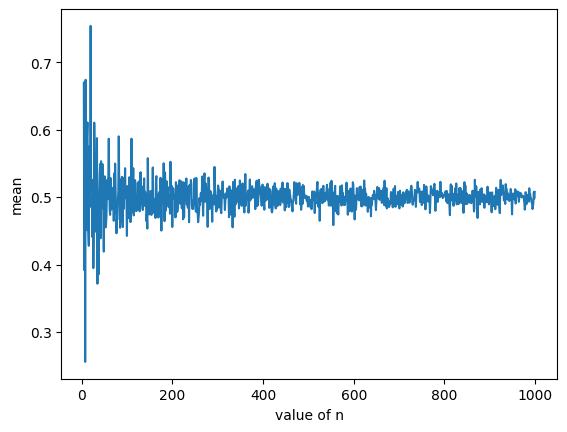

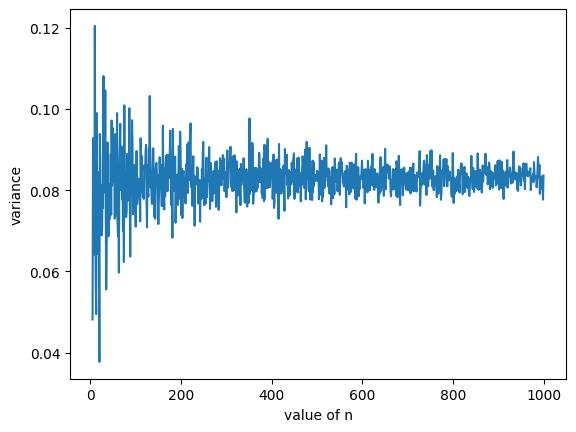

In [17]:
import random
import numpy as np
means=[]
variance=[]
n=1000
for i in range(5,n):
    # number of numbers generated is will be in range(5 to n)
    random_array = np.random.uniform(0.0, 1.0, i)      # using inbuilt unifirm fn to make array of random values form unifirm fn
    mean=np.mean(random_array)
    var=np.var(random_array)
    means.append(mean)
    variance.append(var)
    print("mean:",mean,"variance:",var)    # calculating the mean and variance using numoy inbuilt fn
plt.plot(np.arange(5,n),means)
plt.xlabel("value of n")
plt.ylabel("mean")
plt.show()
plt.xlabel("value of n")
plt.ylabel("variance")
plt.plot(np.arange(5,n),variance)
plt.show()

## Quenstion 3
 Repeat the same experiment as in Question 2 but for a Gaussian distribution
having mean and standard deviation as 4 and 3 respectively.
NOTE: Random number, having a distribution (Gaussian and uniform), can be
generated using inbuilt function.


mean: 6.490092074399934 standard deviation: 4.289943868104254
mean: 6.089716938650049 standard deviation: 2.143957692175163
mean: 5.63920415003262 standard deviation: 1.2475493667142064
mean: 5.024853903559894 standard deviation: 5.09975575955077
mean: 4.567930853156448 standard deviation: 3.105178518750839
mean: 4.766561059821464 standard deviation: 2.880699771155721
mean: 3.061997117333093 standard deviation: 3.012878860232431
mean: 4.022907627729905 standard deviation: 2.9211566585084747
mean: 4.309859014905992 standard deviation: 3.572924822910183
mean: 2.2635840059019015 standard deviation: 2.9385572831926634
mean: 4.252788792255221 standard deviation: 3.799218368750877
mean: 3.739547011057665 standard deviation: 2.5332292288761624
mean: 4.224980909080831 standard deviation: 3.2564275983214284
mean: 4.7916453736094775 standard deviation: 2.5621316229237046
mean: 3.9054564501043454 standard deviation: 1.7875205774987433
mean: 3.166707195828013 standard deviation: 2.8236396867395994

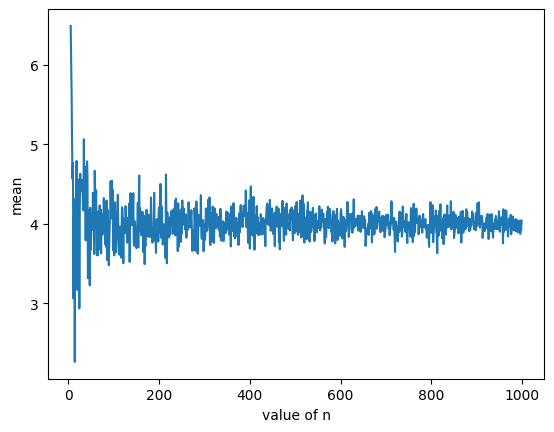

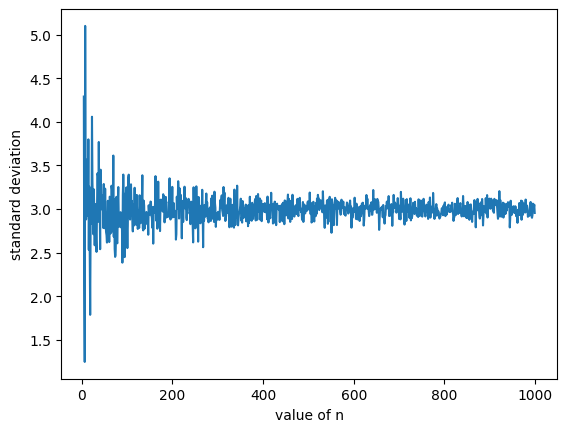

In [12]:
import random
import numpy as np
means=[]
std_var=[]
n=1000
for i in range(5,n): # number of numbers generated is will be in range(5 to 1000)
    arr=np.random.normal(4, 3, i) # using the inbuilt fn of normal distribution to make a array to from nomal/guassian distribution
    mean=np.mean(arr)
    stds=np.std(arr)
    means.append(mean)
    std_var.append(stds)
    print("mean:",mean,"standard deviation:",stds)   # calculating the mean and standarddevistaion using numpy in built fn

plt.plot(np.arange(5,n),means)
plt.xlabel("value of n")
plt.ylabel("mean")
plt.show()
plt.xlabel("value of n")
plt.ylabel("standard deviation")
plt.plot(np.arange(5,n),std_var)
plt.show()
